In [1]:
import numpy as np
import spectral_embedding as se
import matplotlib as mpl
import matplotlib.pyplot as plt

In this example, we generate a stochastic block model, a mixed membership stochastic block model and a degree-corrected stochastic block model, using the same $\mathbf{B}$ link probability matrix in each case. We compute the adjacency spectral embedding and Laplacian spectral embedding to show how the embedding changes depending on the graph generation model.

In [2]:
np.random.seed(15)

In this example, we suppose that each type of stochastic block model has $n=1000$ nodes, $K=2$ communities and a shared matrix $\mathbf{B}$ which indicates the probability nodes in two communities form an edge.

1. For the stochastic block model, each node is assigned a community $\mathbf{Z}_i \in {0,1}$ with probability distribution $\pi$, and, for $i < j$,
$$
	\mathbf{A}_{ij} \mid \mathbf{Z}_i, \mathbf{Z}_j  \stackrel{\mathrm{ind}}{\sim} \textrm{Bernoulli}(\mathbf{B}_{\mathbf{Z}_i, \mathbf{Z}_j}).
$$
In this example, we assign $\pi = (0.5, 0.5)$ so a node is equally likely to belong in either of the two communities.

2. For the mixed membership stochastic block model, each node is assigned a probability distribution over the two communities, which we assume is drawn independently from a Dirichlet distribution $\pi_i {\sim} \textrm{Dirichlet}(\alpha)$. Then, for each pair of nodes $i$ and $j$, we sample the communities that each node plays in that possible connection, $\mathbf{Z}_{i \to j} \sim \pi_i$ and $\mathbf{Z}_{j \to i} \sim \pi_j$. Then, for $i < j$,
$$
	\mathbf{A}_{ij} \mid \mathbf{Z}_i, \mathbf{Z}_j  \stackrel{\mathrm{ind}}{\sim} \textrm{Bernoulli}( \mathbf{B}_{\mathbf{Z}_{i \to j}, \mathbf{Z}_{j \to i}}).
$$
In thie example, we assign $\alpha = (0.25, 0.25)$.

3. For the degree-corrected stochastic block model, each node is assigned a community $\mathbf{Z}_i \in {0,1}$ with probability distribution $\pi$ like in the stochastic block model, but also a node-specific weight parameter $w_i \stackrel{\mathrm{ind}}{\sim} \textrm{Bernoull} $. Then, for $i < j$,
$$
	\mathbf{A}_{ij} \mid \mathbf{Z}_i, \mathbf{Z}_j  \stackrel{\mathrm{ind}}{\sim} \textrm{Bernoulli}(w_i w_j \mathbf{B}_{\mathbf{Z}_i, \mathbf{Z}_j}).
$$
Again, we assign $\pi = (0.5, 0.5)$ as in the stochastic block model.

In [3]:
K = 2
n = 1000
pi = np.repeat(1/K, K)
alpha = np.repeat(0.25, K)
a = 2; b = 2
B = se.generate_B(K, rho=0.2)
print(np.round(B,3))

[[0.17  0.011]
 [0.011 0.072]]


In [4]:
A_SBM, Z_SBM = se.generate_SBM(n, B, pi)
A_MMSBM, Z_MMSBM = se.generate_MMSBM(n, B, alpha)
A_DCSBM, Z_DCSBM, W_DCSBM = se.generate_DCSBM(n, B, pi)

Colour the nodes in the embeddings using their $\mathbf{Z}$ value.

1. For the stochastic block model, the nodes are coloured red or blue depending on their community assignment.

2. For the mixed membership stochastic block model, nodes are partially assigned to both community and their colour is based on their proportion in the red and blue communities. For example, a node with $\pi_i = (0.5, 0,5)$ will be shown in purple.

3. For the degree corrected stochastic block model, nodes will be coloured red or blue like in the stochastic block model, but the opacity is assigned using the node-specific weight parameter $w_i$. If a node has weight close to zero, it will be shown more faintly.

In [5]:
col_SBM   = [[(1.0,0.0,0.0),(0.0,0.0,1.0)][z] for z in Z_SBM]
col_MMSBM = [(z[0],0.0,z[1]) for z in Z_MMSBM]
col_DCSBM = [[(1.0,0.0,0.0,w),(0.0,0.0,1.0,w)][z] for z, w in zip(Z_DCSBM, W_DCSBM)]

Compute the adjacency spectral embedding for the three types of stochastic block model.

In [6]:
XA_SBM   = se.ASE(A_SBM, K)
XA_MMSBM = se.ASE(A_MMSBM, K)
XA_DCSBM = se.ASE(A_DCSBM, K)

Plot each of the stochastic block models in two dimensions, as we know that the true number of communities in the data is equal to two.

1. For the stochastic block model, we see two approxiamtely Gaussian clusters for the two communities. In other examples, we show the asymptotic covariance of these clusters.

2. For the mixed memebership stochastic block model, we again have the red and blue clusters where nodes in-between these two clusters (in purple) represent nodes that are a mixture of the two extremes. The proportion $\pi_i$ is captured by the distance between these two clusters.

3. For degree-corrected stochastic block model, the two communities are represented by two rays starting at the origin. The node-specific weight parameter $w_i$ (represented by the opacity of a node in the plot) is captured by the distance of a node away from the origin.

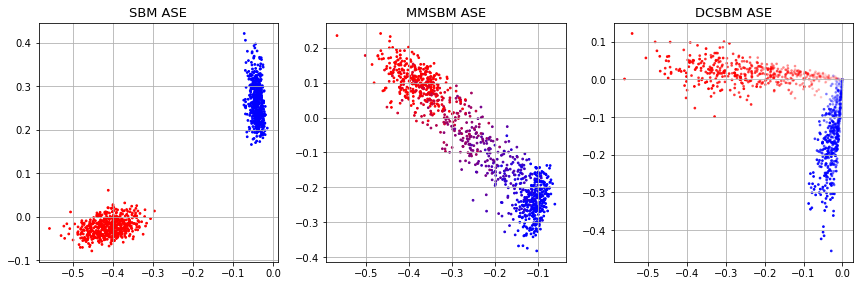

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(14.6,4.4))

axs[0].grid()
axs[0].scatter(XA_SBM[:,0], XA_SBM[:,1], marker='.', s=12, c=col_SBM)
axs[0].set_title('SBM ASE', fontsize=13)

axs[1].grid()
axs[1].scatter(XA_MMSBM[:,0], XA_MMSBM[:,1], marker='.', s=12, c=col_MMSBM)
axs[1].set_title('MMSBM ASE', fontsize=13)

axs[2].grid()
axs[2].scatter(XA_DCSBM[:,0], XA_DCSBM[:,1], marker='.', s=12, c=col_DCSBM)
axs[2].set_title('DCSBM ASE', fontsize=13);

Compute the Laplacian spectral embedding for the three types of stochastic block model.

In [8]:
XL_SBM   = se.LSE(A_SBM, K)
XL_MMSBM = se.LSE(A_MMSBM, K)
XL_DCSBM = se.LSE(A_DCSBM, K)

The plots for the Laplacian spectral embedding are very similar to those for the adjacency spectral embedding in these three different stochastic block model examples.

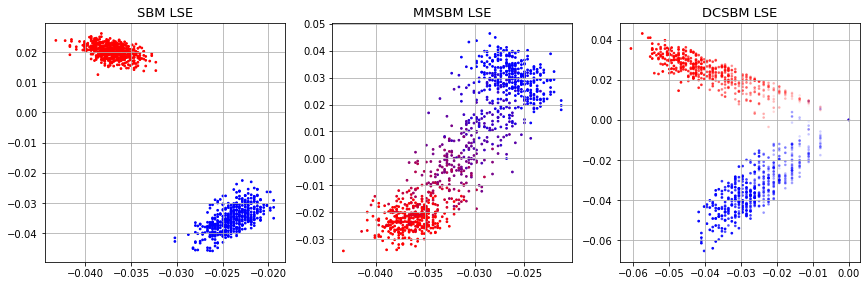

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(14.6,4.4))

axs[0].grid()
axs[0].scatter(XL_SBM[:,0], XL_SBM[:,1], marker='.', s=12, c=col_SBM)
axs[0].set_title('SBM LSE', fontsize=13)

axs[1].grid()
axs[1].scatter(XL_MMSBM[:,0], XL_MMSBM[:,1], marker='.', s=12, c=col_MMSBM)
axs[1].set_title('MMSBM LSE', fontsize=13)

axs[2].grid()
axs[2].scatter(XL_DCSBM[:,0], XL_DCSBM[:,1], marker='.', s=12, c=col_DCSBM)
axs[2].set_title('DCSBM LSE', fontsize=13);